In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import matplotlib.colors as mcolors
from sklearn.mixture import GaussianMixture

In [7]:
df = pd.read_csv(r"C:\Users\joel.alarcon\Desktop\geo_sentry\geo_sentry\var\sample_client\sample_project\processed_data\operativity.csv", sep=";")
# df = df.dropna()
df['east'] = df['east'].astype(float).values
df['north'] = df['north'].astype(float).values

In [8]:
df.head(n=200)

,structure,sensor_type,code,operativiy,east,north,elevation,first_record,first_value,last_record,last_value,max_value,group
0,DME_CHO,PCV,PCV-SH23-101,True,808745.856,9158796.915,2563.591,2023-09-05,0.0,2025-03-08,2.940175,9.185504,NaN
1,DME_CHO,PCV,PCV-SH23-102,True,808893.765,9158919.897,2526.313,2023-09-15,0.0,2025-03-30,-17.367356,7.610324,NaN
2,DME_CHO,PCV,PCV-SH23-103,True,808944.542,9159043.519,2512.112,2023-09-20,0.0,2025-03-30,0.732829,2.807565,NaN
3,DME_SUR,PCV,PCV-SH17-101,True,809676.294,9156254.521,2502.257,2024-10-20,-0.0,2025-04-03,40.678158,77.419430,NaN
4,PAD_1A,PCV,PCV-SH14-01,True,809665.799,9158500.421,2819.153,2015-10-09 10:57:00.000,-0.0,2025-03-30 06:00:00.000,-2.623270,4.866984,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,PAD_2B_2C,SACV,SA-SH17-101,True,810205.105,9157513.472,2529.970,2018-08-19 00:00:00,-0.0,2025-04-01 12:00:00.000,-1022.571757,6.984120,NaN
166,PAD_2B_2C,SACV,SA-SH17-102,True,810196.170,9157632.230,2528.160,2018-08-19 00:00:00.000,-0.0,2020-11-08 18:00:02.592,9.722305,39.263243,NaN
167,PAD_2B_2C,SACV,SA-SH17-103,True,810225.675,9157718.040,2528.850,2018-02-26 00:00:00,-0.0,2025-04-01 12:00:00.000,1051.369054,1061.258349,NaN
168,PAD_2A,CPCV,CPCV-SHP2A-01,True,808870.153,9157304.459,2840.023,2016-08-19 16:50:00.000,0.0,2025-03-30 06:00:00.000,1285.392786,1399.248228,NaN


In [9]:
# Agrupar por 'structure' y 'sensor_type' y contar las ocurrencias
distribution = df.groupby(['structure', 'sensor_type']).size().reset_index(name='count')

print(distribution)

    structure sensor_type  count
0     DME_CHO         PCT     44
1     DME_CHO         PCV      3
2     DME_CHO         PTA      3
3     DME_SUR         PCT     18
4     DME_SUR         PCV      1
5     DME_SUR         PTA      2
6      PAD_1A         PCV      4
7      PAD_1A         PTA     14
8      PAD_2A        CPCV      2
9      PAD_2A         PCT     11
10     PAD_2A         PCV      3
11     PAD_2A         PTA      5
12     PAD_2A        SACV      2
13  PAD_2B_2C         PCT     29
14  PAD_2B_2C         PCV     20
15  PAD_2B_2C         PTA      6
16  PAD_2B_2C        SACV      3


In [10]:
sensor_types = df['sensor_type'].unique()
print(sensor_types)

['PCV' 'PTA' 'PCT' 'SACV' 'CPCV']


In [11]:
structures = distribution['structure'].unique()
print(structures)

['DME_CHO' 'DME_SUR' 'PAD_1A' 'PAD_2A' 'PAD_2B_2C']


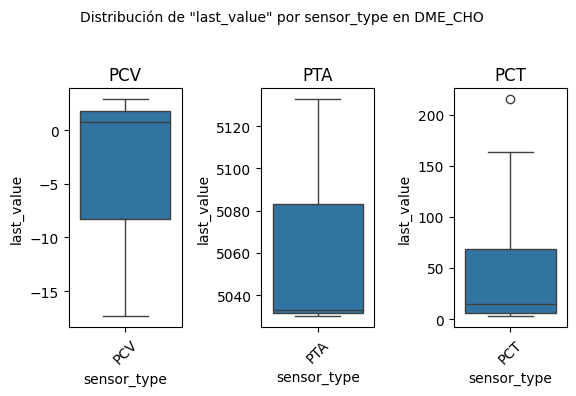

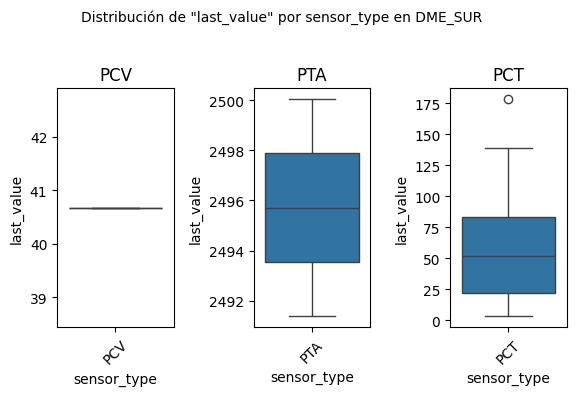

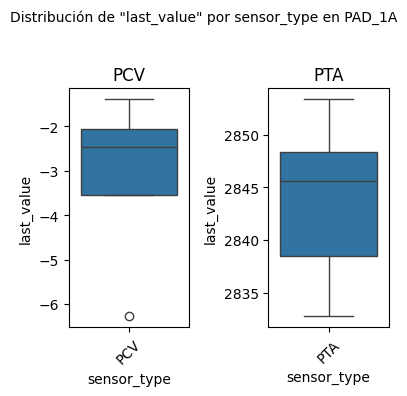

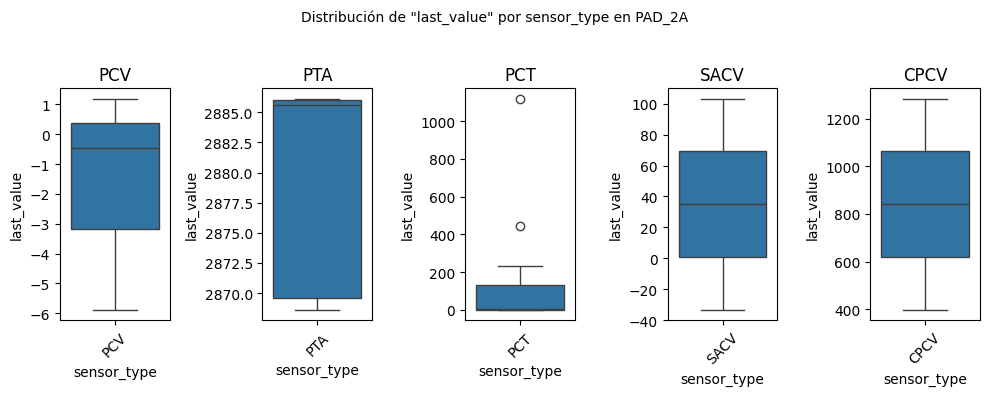

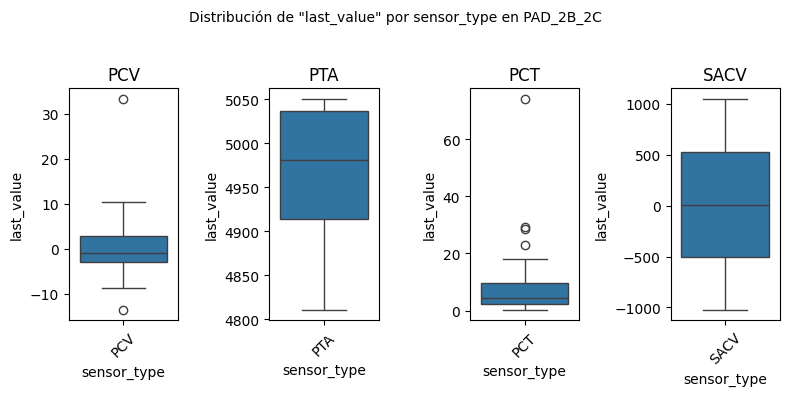

In [12]:
# Crear gráficos para cada estructura con subplots por sensor_type
for structure in structures:
    subset = df[df['structure'] == structure]
    sensor_types = subset['sensor_type'].unique()
    num_sensor_types = len(sensor_types)
    
    fig, axes = plt.subplots(nrows=1, ncols=num_sensor_types, figsize=(2 * num_sensor_types, 4))

    fig.suptitle(f'Distribución de "last_value" por sensor_type en {structure}', fontsize=10)
    
    if num_sensor_types == 1:
        axes = [axes]  # Asegurarse de que axes sea iterable si hay solo un sensor_type
    
    for ax, sensor_type in zip(axes, sensor_types):
        sensor_subset = subset[subset['sensor_type'] == sensor_type]
        sns.boxplot(data=sensor_subset, x='sensor_type', y='last_value', ax=ax)
        ax.set_title(sensor_type)
        ax.set_xlabel('sensor_type')
        ax.set_ylabel('last_value')
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar para no solapar con el título
    plt.show()

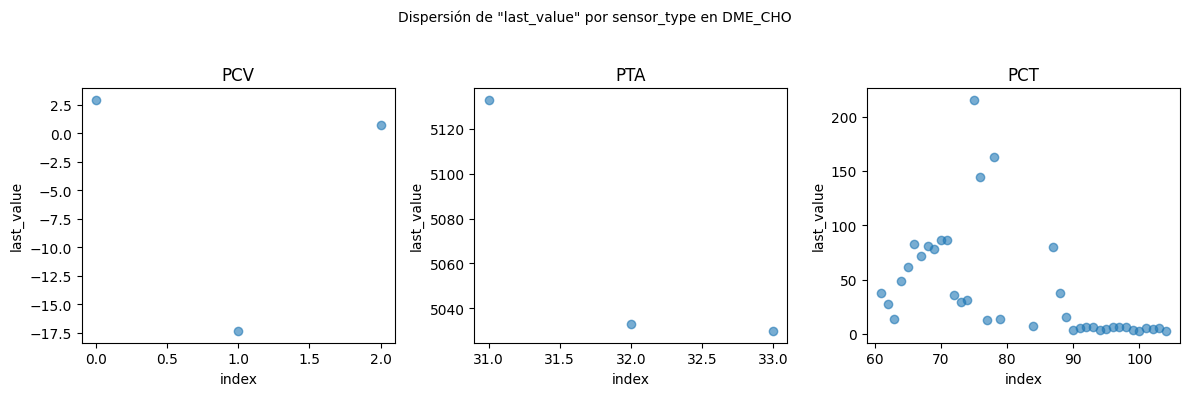

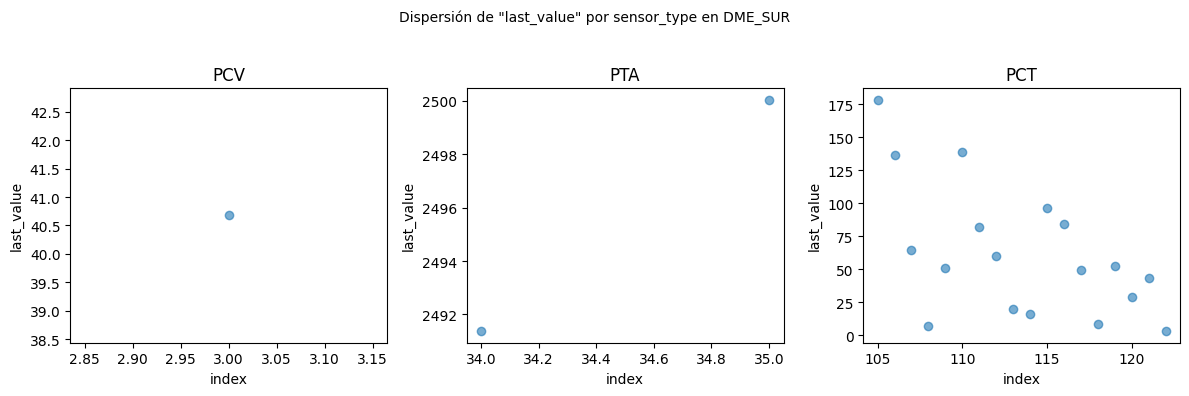

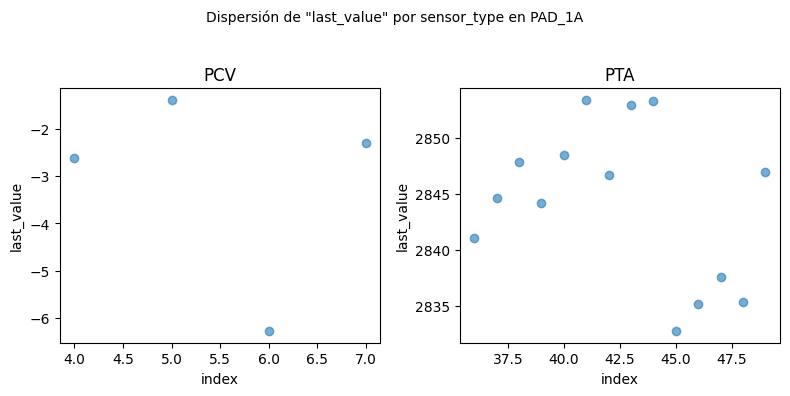

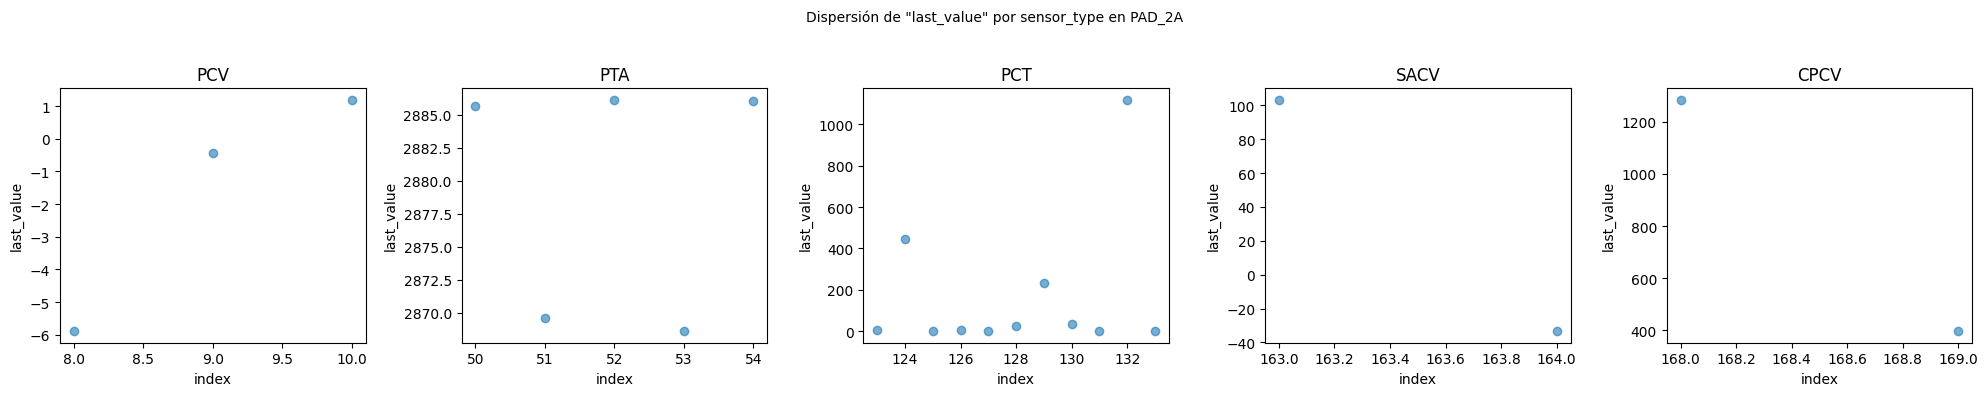

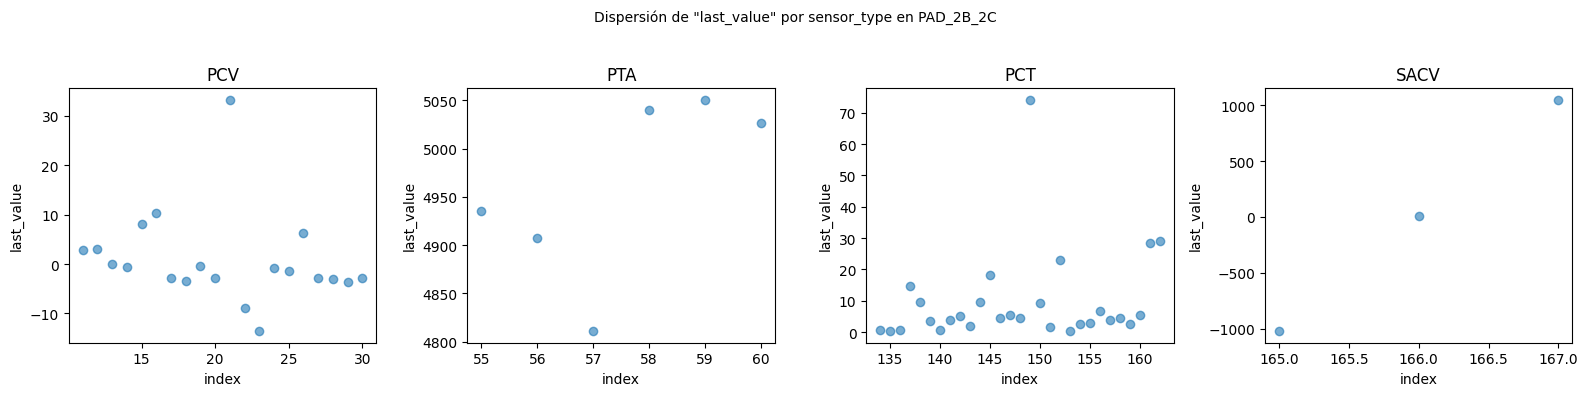

In [13]:
for structure in structures:
    subset = df[df['structure'] == structure]
    sensor_types = subset['sensor_type'].unique()
    num_sensor_types = len(sensor_types)
    
    fig, axes = plt.subplots(nrows=1, ncols=num_sensor_types, figsize=(4 * num_sensor_types, 4))
    fig.suptitle(f'Dispersión de "last_value" por sensor_type en {structure}', fontsize=10)
    
    if num_sensor_types == 1:
        axes = [axes]  # Asegurarse de que axes sea iterable
    
    for ax, sensor_type in zip(axes, sensor_types):
        sensor_subset = subset[subset['sensor_type'] == sensor_type]
        
        # Scatter plot: eje x es índice (o tiempo si tienes), eje y es last_value
        ax.scatter(sensor_subset.index, sensor_subset['last_value'], alpha=0.6)
        ax.set_title(f'{sensor_type}')
        ax.set_xlabel('index')  # Cambiar a 'Tiempo' si tienes columna de timestamp
        ax.set_ylabel('last_value')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


C:\Users\joel.alarcon\AppData\Local\Temp\ipykernel_6508\909641014.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pct['bubble_size'] = (df_pct['last_value'] / max_val) * bubble_scale


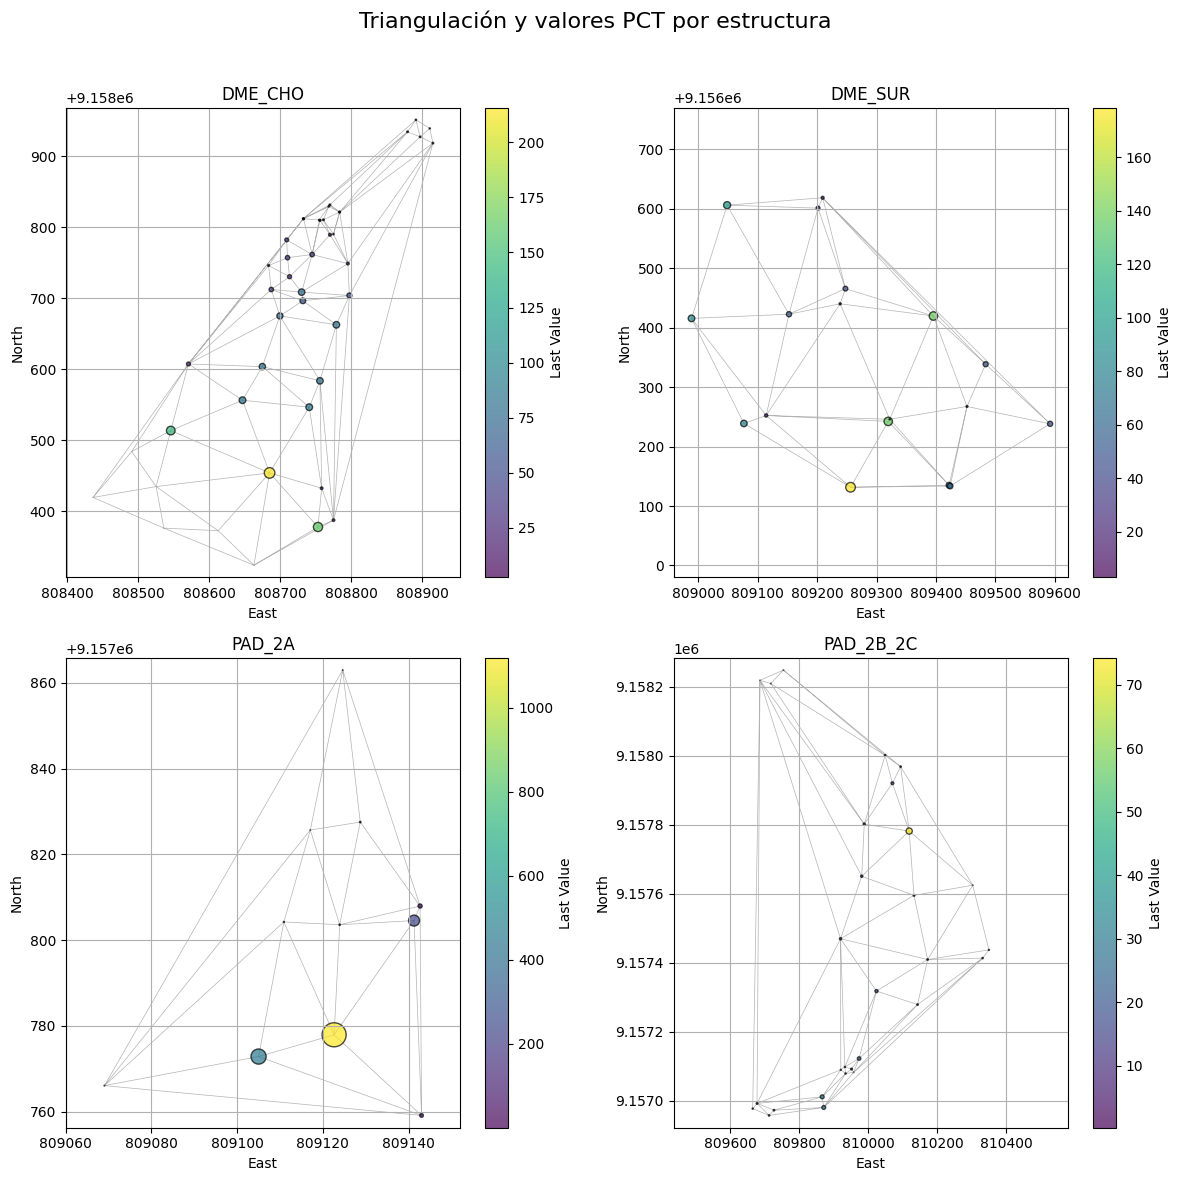

In [14]:
# Filtrar el dataframe por sensor_type='PCT'
df_pct = df[df['sensor_type'] == 'PCT']

# Obtener estructuras únicas
structures = df_pct['structure'].unique()
num_structures = len(structures)

# Layout de subplots
cols = 2
rows = (num_structures + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows))
axes = axes.flatten()

# Escalar burbujas
max_val = df_pct['last_value'].max()
bubble_scale = 300
df_pct['bubble_size'] = (df_pct['last_value'] / max_val) * bubble_scale

# Colormap para la transición de colores
cmap = plt.get_cmap('viridis')  # Puedes cambiar el colormap a cualquier otro, como 'plasma', 'inferno', etc.
norm = mcolors.Normalize(vmin=df_pct['last_value'].min(), vmax=df_pct['last_value'].max())

for i, structure in enumerate(structures):
    subset = df_pct[df_pct['structure'] == structure]
    x = subset['east'].astype(float).values
    y = subset['north'].astype(float).values
    s = subset['bubble_size'].values
    c = subset['last_value'].values  # Usamos last_value para los colores

    ax = axes[i]
    
    # Triangulación si hay suficientes puntos
    if len(x) >= 3:
        triang = tri.Triangulation(x, y)
        ax.triplot(triang, color='gray', linewidth=0.5, alpha=0.6)
    
    scatter = ax.scatter(x, y, s=s, c=c, cmap=cmap, alpha=0.7, edgecolor='k')
    
    ax.set_title(f'{structure}')
    ax.set_xlabel('East')
    ax.set_ylabel('North')
    ax.grid(True)
    ax.axis('equal')

    # Barra de color para mostrar la transición de valores
    fig.colorbar(scatter, ax=ax, orientation='vertical', label='Last Value')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Triangulación y valores PCT por estructura', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


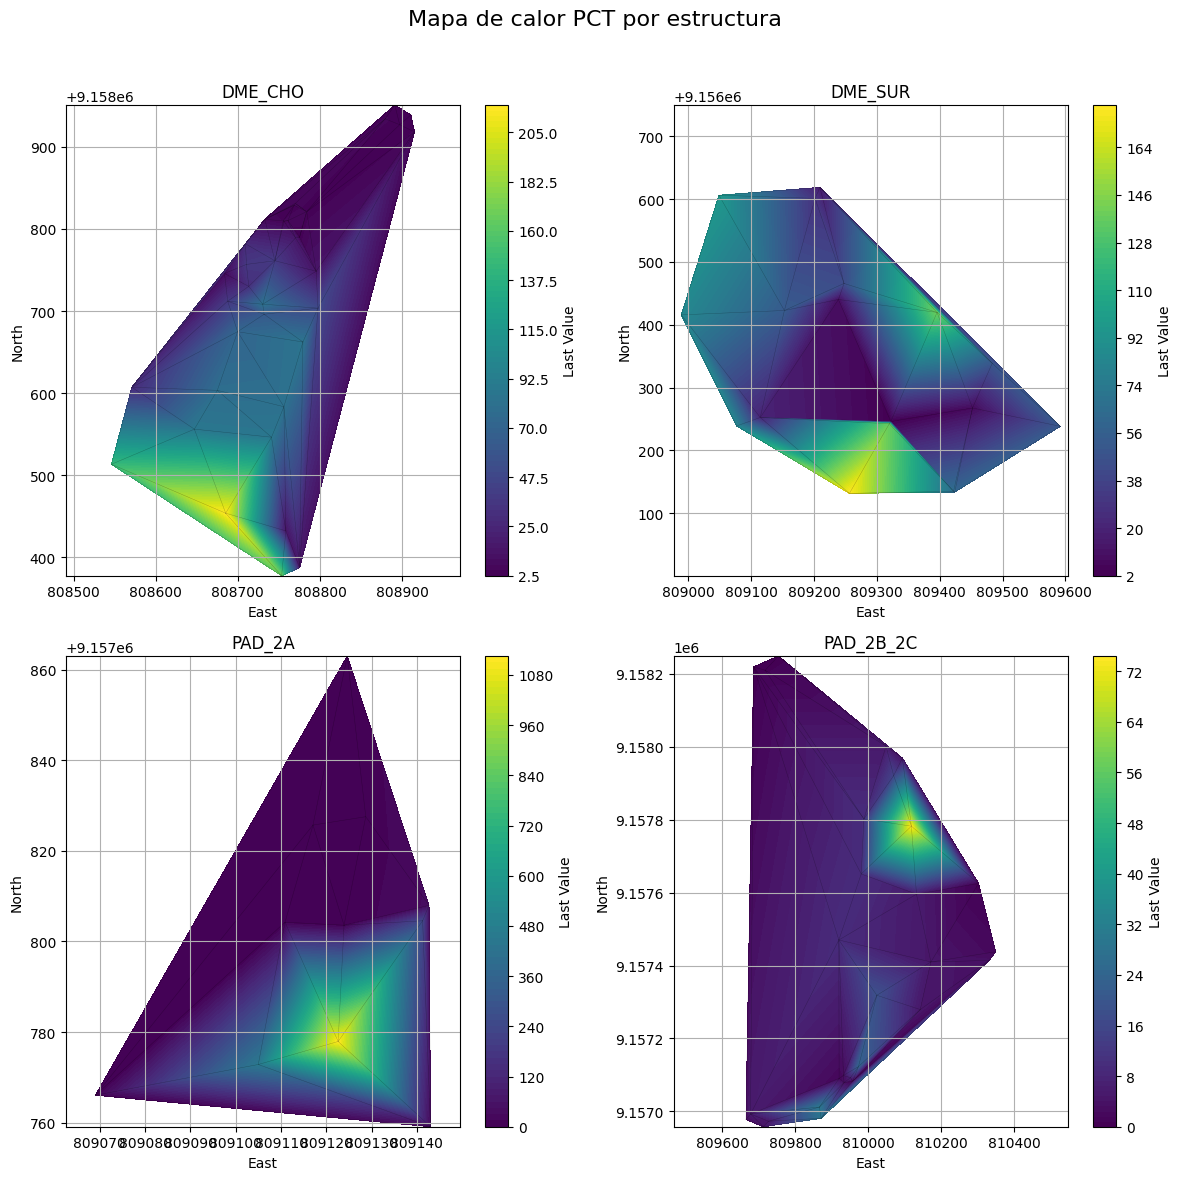

In [15]:
# Filtrar el dataframe por sensor_type='PCT'
df_pct = df[df['sensor_type'] == 'PCT']

# Obtener estructuras únicas
structures = df_pct['structure'].unique()
num_structures = len(structures)

# Layout de subplots
cols = 2
rows = (num_structures + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows))
axes = axes.flatten()

# Colormap base
cmap = plt.get_cmap('viridis')

for i, structure in enumerate(structures):
    subset = df_pct[df_pct['structure'] == structure]
    
    x = subset['east'].astype(float).values
    y = subset['north'].astype(float).values
    z = subset['last_value'].values

    # Filtrar valores válidos
    valid_mask = np.isfinite(x) & np.isfinite(y) & np.isfinite(z)
    x, y, z = x[valid_mask], y[valid_mask], z[valid_mask]

    ax = axes[i]

    if len(x) >= 3:
        triang = tri.Triangulation(x, y)

        # Normalización individual por estructura
        norm = mcolors.Normalize(vmin=np.min(z), vmax=np.max(z))
        tcf = ax.tricontourf(triang, z, cmap=cmap, levels=100, norm=norm)
        ax.triplot(triang, color='k', linewidth=0.3, alpha=0.3)

        # Barra de color individual
        cbar = fig.colorbar(tcf, ax=ax, orientation='vertical')
        cbar.set_label('Last Value')

    ax.set_title(f'{structure}')
    ax.set_xlabel('East')
    ax.set_ylabel('North')
    ax.grid(True)
    ax.axis('equal')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Mapa de calor PCT por estructura', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\joel.alarcon\AppData\Local\Temp\ipykernel_6508\4098699792.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_structure['cluster'] = best_gmm.predict(X)


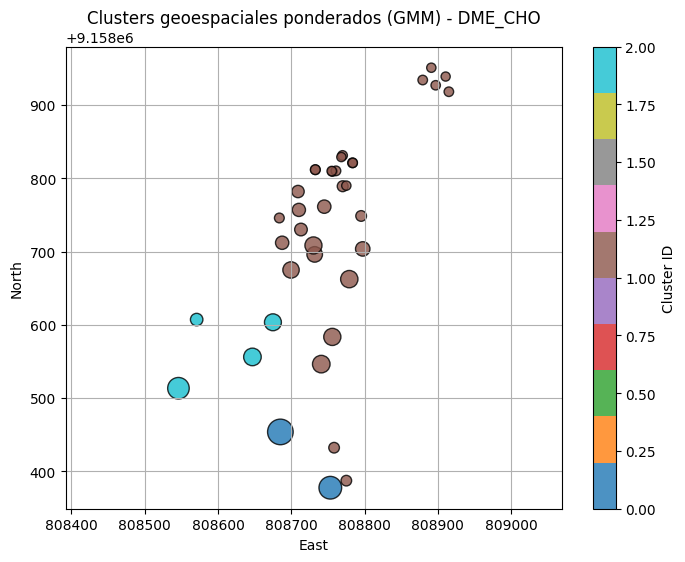

C:\Users\joel.alarcon\AppData\Local\Temp\ipykernel_6508\4098699792.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_structure['cluster'] = best_gmm.predict(X)


Columnas de df_structure para la estructura DME_CHO: ['structure', 'sensor_type', 'code', 'operativiy', 'east', 'north', 'elevation', 'first_record', 'first_value', 'last_record', 'last_value', 'max_value', 'group', 'cluster']
Grupo para la estructura: DME_CHO
    structure sensor_type     code  operativiy         east         north  \
75    DME_CHO         PCT    CH-41        True  808685.1800  9.158454e+06   
78    DME_CHO         PCT    CH-44        True  808753.3160  9.158378e+06   
63    DME_CHO         PCT    CH-21        True  808795.3925  9.158749e+06   
61    DME_CHO         PCT     CH-1        True  808745.0770  9.158761e+06   
65    DME_CHO         PCT    CH-23        True  808731.9985  9.158696e+06   
66    DME_CHO         PCT    CH-24        True  808779.2150  9.158662e+06   
67    DME_CHO         PCT    CH-25        True  808699.7155  9.158675e+06   
62    DME_CHO         PCT     CH-2        True  808709.2810  9.158782e+06   
68    DME_CHO         PCT    CH-26        True

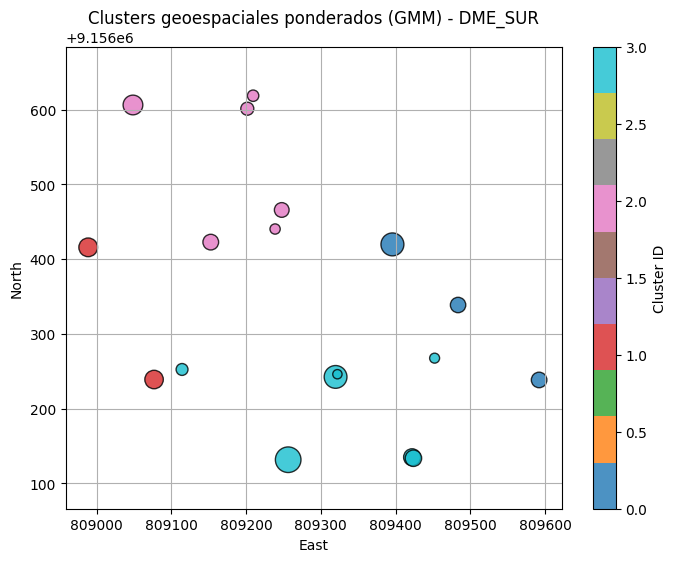

Columnas de df_structure para la estructura DME_SUR: ['structure', 'sensor_type', 'code', 'operativiy', 'east', 'north', 'elevation', 'first_record', 'first_value', 'last_record', 'last_value', 'max_value', 'group', 'cluster']
Grupo para la estructura: DME_SUR
    structure sensor_type  code  operativiy         east        north  \
110   DME_SUR         PCT  P-06        True  809395.7835  9156419.573   
109   DME_SUR         PCT  P-05        True  809591.9815  9156238.261   
117   DME_SUR         PCT  P-13        True  809483.5920  9156338.511   
111   DME_SUR         PCT  P-07        True  809076.9650  9156238.844   
116   DME_SUR         PCT  P-12        True  808988.8565  9156415.643   
115   DME_SUR         PCT  P-11        True  809048.7275  9156606.051   
114   DME_SUR         PCT  P-10        True  809209.4470  9156618.445   
119   DME_SUR         PCT  P-15        True  809152.7930  9156422.607   
120   DME_SUR         PCT  P-16        True  809201.6585  9156601.052   
118   DME

C:\Users\joel.alarcon\AppData\Local\Temp\ipykernel_6508\4098699792.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_structure['cluster'] = best_gmm.predict(X)


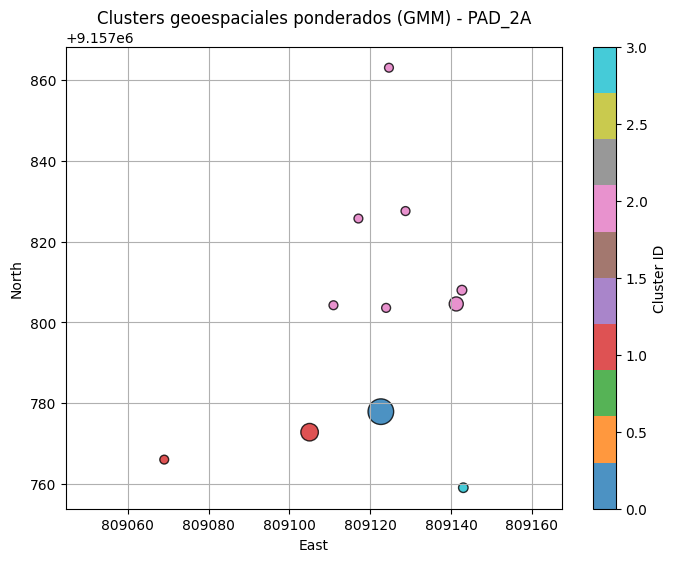

Columnas de df_structure para la estructura PAD_2A: ['structure', 'sensor_type', 'code', 'operativiy', 'east', 'north', 'elevation', 'first_record', 'first_value', 'last_record', 'last_value', 'max_value', 'group', 'cluster']
Grupo para la estructura: PAD_2A
    structure sensor_type  code  operativiy        east        north  \
132    PAD_2A         PCT   CA8        True  809122.614  9157777.910   
124    PAD_2A         PCT  CA10        True  809104.986  9157772.830   
125    PAD_2A         PCT  CA11        True  809069.021  9157766.049   
123    PAD_2A         PCT   CA1        True  809123.914  9157803.585   
127    PAD_2A         PCT   CA3        True  809117.060  9157825.690   
129    PAD_2A         PCT   CA5        True  809141.266  9157804.560   
130    PAD_2A         PCT   CA6        True  809142.673  9157807.962   
126    PAD_2A         PCT   CA2        True  809128.712  9157827.540   
133    PAD_2A         PCT   CA9        True  809110.886  9157804.241   
131    PAD_2A        

C:\Users\joel.alarcon\AppData\Local\Temp\ipykernel_6508\4098699792.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_structure['cluster'] = best_gmm.predict(X)


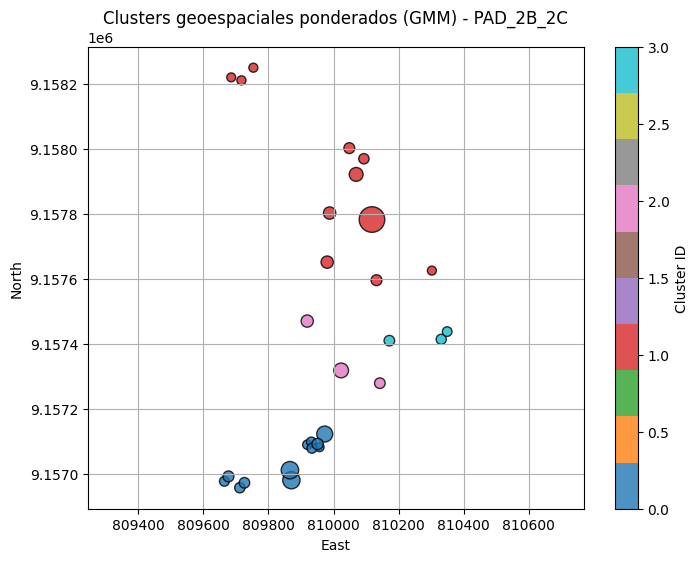

Columnas de df_structure para la estructura PAD_2B_2C: ['structure', 'sensor_type', 'code', 'operativiy', 'east', 'north', 'elevation', 'first_record', 'first_value', 'last_record', 'last_value', 'max_value', 'group', 'cluster']
Grupo para la estructura: PAD_2B_2C
     structure sensor_type         code  operativiy         east        north  \
158  PAD_2B_2C         PCT   PAD OVER-2        True  809726.1400  9156973.114   
157  PAD_2B_2C         PCT   PAD OVER-1        True  809711.9810  9156957.959   
155  PAD_2B_2C         PCT  PAD 2B-FS-8        True  809933.6660  9157079.339   
156  PAD_2B_2C         PCT  PAD 2B-FS-9        True  809951.0270  9157092.402   
161  PAD_2B_2C         PCT   PAD OVER-5        True  809870.4654  9156981.055   
160  PAD_2B_2C         PCT   PAD OVER-4        True  809677.0740  9156992.737   
159  PAD_2B_2C         PCT   PAD OVER-3        True  809664.4880  9156977.688   
162  PAD_2B_2C         PCT   PAD OVER-6        True  809865.9570  9157011.867   
154  P

In [16]:
# Filtrar por sensor_type='PCT'
df_pct = df[df['sensor_type'] == 'PCT'].copy()

# Eliminar filas donde 'last_value' es NaN
df_pct = df_pct.dropna(subset=['last_value'])

# Omitir estructuras que no tienen sensores PCT
estructuras_validas = df_pct['structure'].dropna().unique()
df_pct = df_pct[df_pct['structure'].isin(estructuras_validas)]

# Asegurarse de que las columnas 'east' y 'north' sean de tipo float
df_pct['east'] = df_pct['east'].astype(float)
df_pct['north'] = df_pct['north'].astype(float)

# Iterar sobre cada 'structure'
for structure in df_pct['structure'].unique():
    # Filtrar los datos de la estructura actual
    df_structure = df_pct[df_pct['structure'] == structure]

    # Datos para clustering
    X = df_structure[['east', 'north']].values
    weights = df_structure['last_value'].astype(float).values

    # Asegurarse de que no haya NaNs en los pesos
    weights = weights[~np.isnan(weights)]

    # Normalizar pesos para evitar dominancia
    weights = weights / np.max(weights)

    # Crear un conjunto de datos ponderado replicando puntos según sus pesos
    X_weighted = []
    for i in range(len(X)):
        # Usar int() solo si el peso es un valor válido
        if weights[i] > 0:
            X_weighted.extend([X[i]] * int(weights[i] * 100))  # multiplicamos por 10 para darle mayor peso
    X_weighted = np.array(X_weighted)

    # Aplicar Gaussian Mixture Model con los datos ponderados
    lowest_bic = np.inf
    best_gmm = None
    bic_scores = []
    n_components_range = range(1, 5)

    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=15)
        gmm.fit(X_weighted)
        bic = gmm.bic(X_weighted)
        bic_scores.append(bic)

        if bic < lowest_bic:
            lowest_bic = bic
            best_gmm = gmm

    # Asignar etiquetas de cluster
    df_structure['cluster'] = best_gmm.predict(X)

    # Visualización para esta estructura
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        df_structure['east'], df_structure['north'],
        c=df_structure['cluster'], cmap='tab10',
        s=40 + 300 * weights,  # Tamaño de las burbujas proporcional al peso
        alpha=0.8, edgecolor='k'
    )
    plt.title(f'Clusters geoespaciales ponderados (GMM) - {structure}')
    plt.xlabel('East')
    plt.ylabel('North')
    plt.colorbar(scatter, label='Cluster ID')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    # Verificar que la columna 'cluster' se ha asignado correctamente
    print(f"Columnas de df_structure para la estructura {structure}: {df_structure.columns.tolist()}")

    # Imprimir una tabla con los valores de east, north, last_value y cluster para cada estructura
    print(f"Grupo para la estructura: {structure}")
    print(df_structure.sort_values(by='cluster'))
    print("\n")